In [27]:
import numpy as np
import pandas as pd

In [28]:
df=pd.read_csv("1000_Companies.csv")

In [50]:
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [30]:
import seaborn as sns

<AxesSubplot:xlabel='State', ylabel='count'>

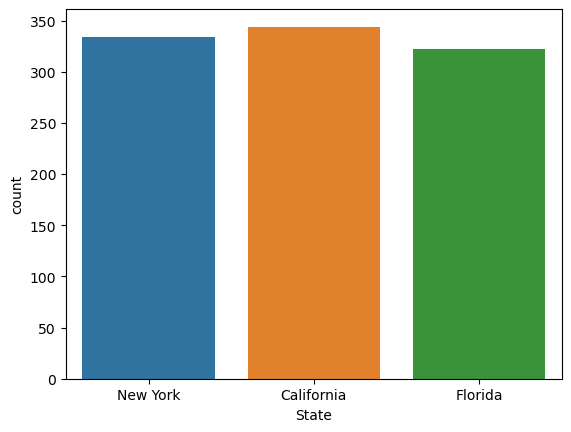

In [31]:
sns.countplot(x=df["State"])

In [32]:
df["State"].value_counts()

California    344
New York      334
Florida       322
Name: State, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [5]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
from sklearn.preprocessing import OrdinalEncoder

In [9]:
encoder=OrdinalEncoder()
c=['State']
df[c]=encoder.fit_transform(df[c])

In [10]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2.0,192261.83
1,162597.70,151377.59,443898.53,0.0,191792.06
2,153441.51,101145.55,407934.54,1.0,191050.39
3,144372.41,118671.85,383199.62,2.0,182901.99
4,142107.34,91391.77,366168.42,1.0,166187.94


In [11]:
corr=df.corr()
corr.style.background_gradient()

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.582434,0.978407,-0.001360,0.945245
Administration,0.582434,1.000000,0.520465,-0.018386,0.741560
Marketing Spend,0.978407,0.520465,1.000000,-0.001420,0.917270
State,-0.001360,-0.018386,-0.001420,1.000000,-0.005718
Profit,0.945245,0.741560,0.917270,-0.005718,1.000000


In [13]:
x=df[["R&D Spend","Administration","Marketing Spend","State"]]
y=df["Profit"]

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
x_train

,R&D Spend,Administration,Marketing Spend,State
687,38385.0,116125.9672,142843.00150,0.0
500,125610.0,129007.7526,311143.87720,1.0
332,101322.0,125420.7901,264280.11490,0.0
979,12914.0,112364.2939,93696.63744,0.0
817,109909.0,126688.9574,280848.75480,2.0
...,...,...,...,...
835,110391.0,126760.1413,281778.77510,0.0
192,53078.0,118295.8964,171193.18510,0.0
629,22876.0,113835.5275,112918.34360,0.0
559,66766.0,120317.4026,197604.21850,0.0


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

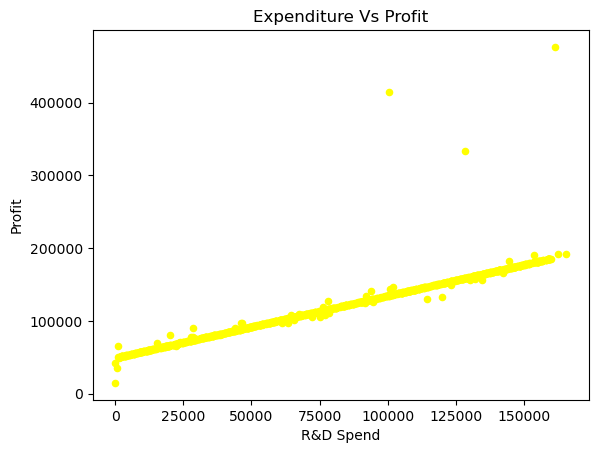

In [26]:
df.plot(kind='scatter',x='R&D Spend',y='Profit',color='yellow')
plt.title("Expenditure Vs Profit")
plt.show()

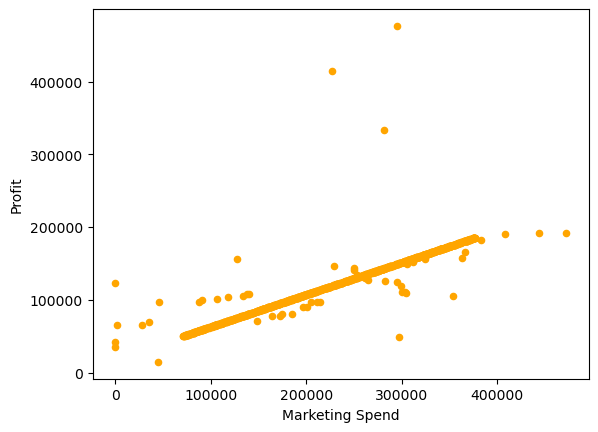

In [33]:
df.plot(kind='scatter',x='Marketing Spend',y='Profit',color='orange')
plt.show()

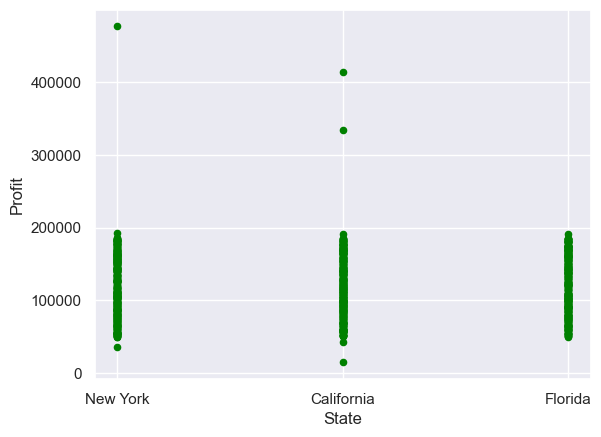

In [49]:
df.plot(kind='scatter',x='State',y='Profit',color='green')
plt.show()

In [34]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [35]:
y_pred=regressor.predict(x_test)
print(y_pred)

[ 89624.88499983  88261.44060358  94728.57723845 176034.49990954
  83234.84214495 110393.04058199 131831.18880607  91307.52461765
 164414.26754671  53585.35570743  66786.11950078 150921.89704628
 126746.78121459  59174.341725   177341.80724482  75139.98127599
 118605.9491146  164403.24374731 171336.34862472 181885.06087421
 118762.26624783  85504.5201526  181345.84072646  83979.76201107
 104839.00200137 101067.00608604  53722.31401539  56706.45386115
  68732.18107141 209811.34272095 121136.34391499 111557.54775873
 101309.70393418 138315.39958078  63806.10546728 108690.79660343
 185830.38310114 171796.58186122 174997.97325294 118029.33822338
  96553.52264734 165281.03076793 107557.31012676  50557.29080259
 116871.82636073  58469.02312669 158771.35516035  78902.17488961
 160082.45834529 131494.74562654 185233.67354482 174962.79318566
  93579.64586335  78164.61392891 180561.94494338  84821.87449117
 143256.92009399 170435.21728058  84188.13777206 105128.89266269
 142016.17711741  52352.6

In [37]:
regressor.coef_

array([ 5.27572958e-01,  8.44490415e-01,  1.06639226e-01, -3.54869857e+02])

In [38]:
print(regressor.intercept_)

-51144.72642572175


In [39]:
from sklearn.metrics import r2_score
r=r2_score(y_test,y_pred)
r*100

91.12595959622044

<AxesSubplot:xlabel='Profit'>

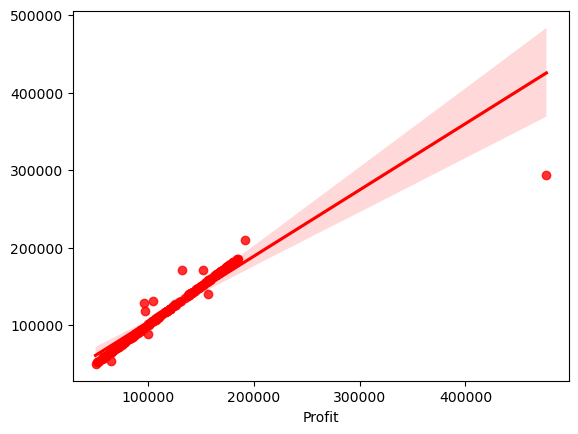

In [45]:
sns.regplot(data=df,x=y_test,y=y_pred,color='red')